<a href="https://colab.research.google.com/github/parisazeynaly/heart_disease-DeepLearning/blob/main/heart_disease_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/parisazeynaly/heart_disease-DeepLearning.git

fatal: destination path 'heart_disease-DeepLearning' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization



In [4]:
# Load Dataset
df = pd.read_csv("heart.csv")


In [5]:
# Display Basic Info
print(df.info())  # Dataset summary
print(df.describe().T.round(2))  # Statistical summary
print(df.head())  # First few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              count    mean     std   min     25%    50%    75%    max
Age           918.0   53.51    9.43  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.40   18.51   0.0  120.00  130.

**EDA**

Visualizing RestingBP vs Cholesterol

<Figure size 600x400 with 0 Axes>

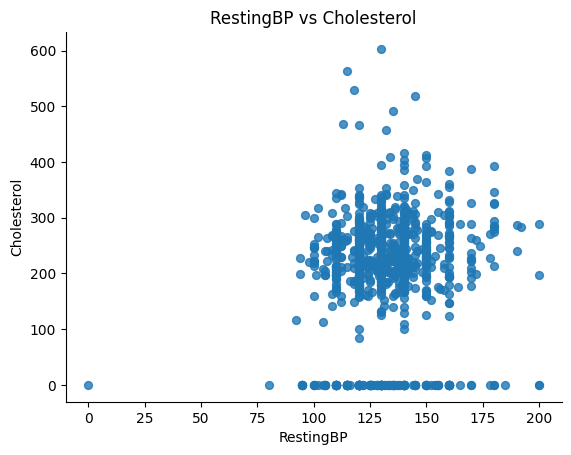

In [6]:
plt.figure(figsize=(6, 4))
df.plot(kind='scatter', x='RestingBP', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("RestingBP vs Cholesterol")
plt.show()

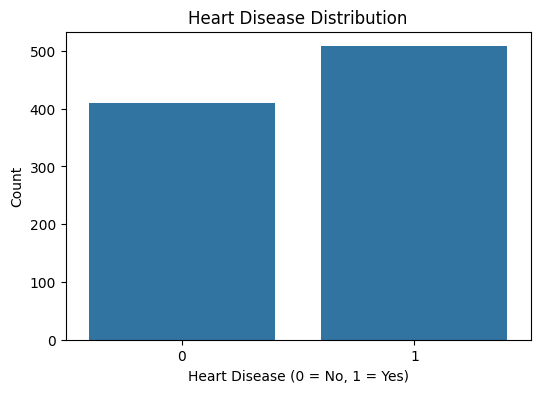

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["HeartDisease"])
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Preprocessing

In [8]:
# Encode Categorical Variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)


In [9]:
# Normalize Numerical Features
scaler = StandardScaler()
num_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df[num_features] = scaler.fit_transform(df[num_features])


# ***********

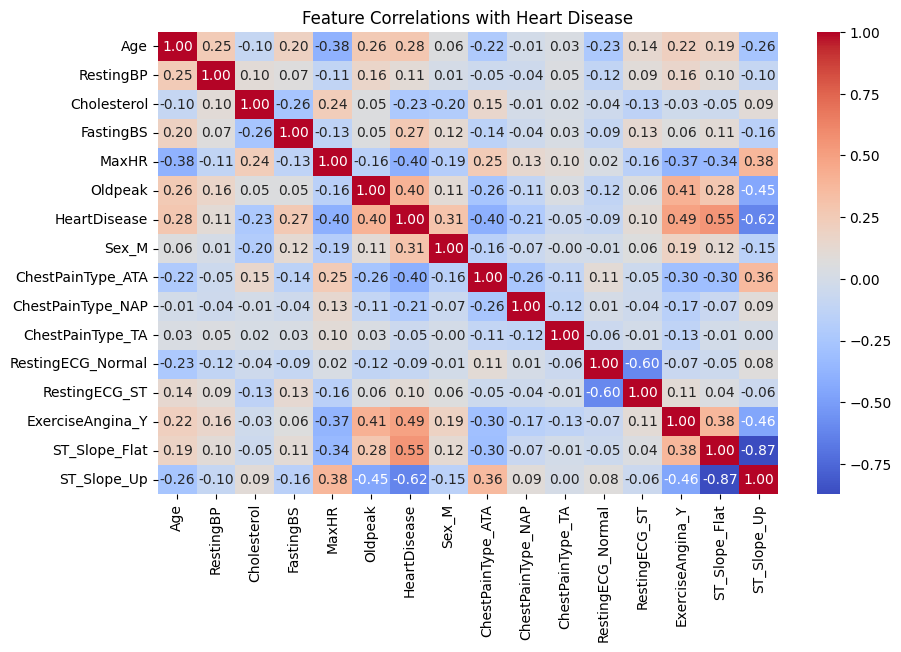

In [10]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Heart Disease")
plt.show()


In [11]:
#  Define Features & Target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [12]:
#  Split Dataset (Stratified to Preserve Class Balance)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)


In [13]:
# Convert to NumPy arrays
x_train, x_test = np.array(x_train), np.array(x_test)
y_train, y_test = np.array(y_train), np.array(y_test)

In [14]:
#  Compute Class Weights (Fix Class Imbalance)
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [15]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (734, 15)
X_test shape: (184, 15)
y_train shape: (734,)
y_test shape: (184,)


In [16]:
# Ensure all data is numeric
x_train = pd.DataFrame(x_train).apply(pd.to_numeric, errors='coerce')
x_test = pd.DataFrame(x_test).apply(pd.to_numeric, errors='coerce')

Model defenition

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [19]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), class_weight=class_weights_dict)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6813 - loss: 0.6545 - val_accuracy: 0.7989 - val_loss: 0.6041
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8391 - loss: 0.4029 - val_accuracy: 0.8370 - val_loss: 0.5276
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8598 - loss: 0.3443 - val_accuracy: 0.8370 - val_loss: 0.5032
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3274 - val_accuracy: 0.8478 - val_loss: 0.4742
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8685 - loss: 0.3159 - val_accuracy: 0.8533 - val_loss: 0.4469
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8974 - loss: 0.2898 - val_accuracy: 0.8533 - val_loss: 0.4312
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8461 - loss: 0.3353 - val_accuracy: 0.8587 - val_loss: 0.4148
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8878 - loss: 0.3071 - val_accuracy: 0.8587 - val_loss

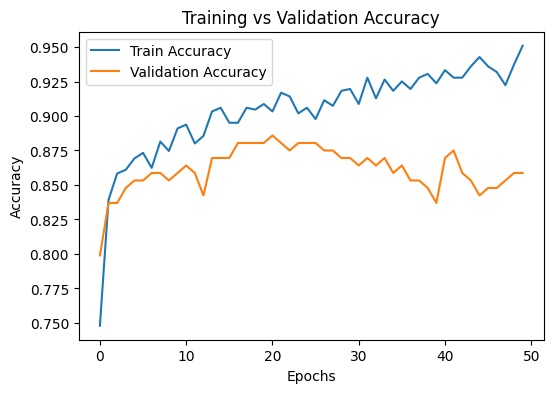

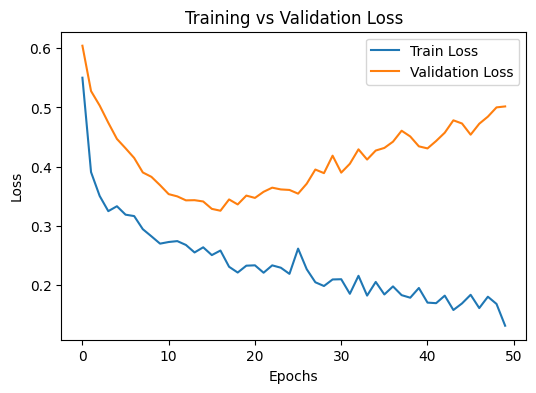

In [20]:
# Plot Training Performance
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [21]:
# Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\n Test Accuracy: {test_acc:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8788 - loss: 0.4466

 Test Accuracy: 0.8587


In [22]:
from sklearn.metrics import classification_report
#  Generate Classification Report
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [23]:


!pip install mlflow

import mlflow
import mlflow.sklearn

mlflow.set_experiment("Your_Project_Experiment")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.8/672.8 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


2025/03/08 17:16:01 INFO mlflow.tracking.fluent: Experiment with name 'Your_Project_Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/318098281294052829', creation_time=1741454161384, experiment_id='318098281294052829', last_update_time=1741454161384, lifecycle_stage='active', name='Your_Project_Experiment', tags={}>

In [24]:
model.save("model/heart_disease_model.h5")


In [25]:
# Set up the optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=5e-5)

# Compile the model with the new optimizer if needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

with mlflow.start_run() as run:
    # Training loop using Keras fit method
    history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                        validation_data=(x_test, y_test), class_weight=class_weights_dict)

    # Log metrics after each epoch
    for epoch in range(20):
        mlflow.log_metric("loss", history.history['loss'][epoch], step=epoch + 1)
        mlflow.log_metric("accuracy", history.history['accuracy'][epoch], step=epoch + 1)
        mlflow.log_metric("val_loss", history.history['val_loss'][epoch], step=epoch + 1)
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][epoch], step=epoch + 1)

    # Log model using mlflow.keras
    mlflow.keras.log_model(model, "model")

    # Print run_id
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9266 - loss: 0.1700 - val_accuracy: 0.8587 - val_loss: 0.5029
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9638 - loss: 0.1110 - val_accuracy: 0.8587 - val_loss: 0.5055
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9473 - loss: 0.1504 - val_accuracy: 0.8587 - val_loss: 0.5055
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9436 - loss: 0.1690 - val_accuracy: 0.8533 - val_loss: 0.5050
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9371 - loss: 0.1418 - val_accuracy: 0.8533 - val_loss: 0.5050
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9392 - loss: 0.1629 - val_accuracy: 0.8533 - val_loss: 0.5053
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9231 - loss: 0.1846 - val_accuracy: 0.8533 - val_loss: 0.5036
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9627 - loss: 0.1290 - val_accuracy: 0.8533 - v

2025/03/08 17:16:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/03/08 17:16:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: ac6d7ec93e1f4038b4789fc369fd89d6


In [26]:
#Serve the model locally using MLflow
!mlflow models serve -m runs:/{value from run_id}/model -p 5000 --no-conda


#zip the folder and download it:

!zip -r mlruns.zip /content/mlruns


# Download the zipped file
from google.colab import files
files.download('mlruns.zip')

Usage: mlflow models serve [OPTIONS]
Try 'mlflow models serve --help' for help.

Error: Got unexpected extra arguments (from run_id}/model)
  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/318098281294052829/ (stored 0%)
  adding: content/mlruns/318098281294052829/meta.yaml (deflated 31%)
  adding: content/mlruns/318098281294052829/ac6d7ec93e1f4038b4789fc369fd89d6/ (stored 0%)
  adding: content/mlruns/318098281294052829/ac6d7ec93e1f4038b4789fc369fd89d6/tags/ (stored 0%)
  adding: content/mlruns/318098281294052829/ac6d7ec93e1f4038b4789fc369fd89d6/tags/mlflow.source.name (deflated 5%)
  adding: content/mlruns/318098281294052829/ac6d7ec93e1f4038b4789fc369fd89d6/tags/mlflow.user (stored 0%)
  adding: content/mlruns/318098281294052829/ac6d7ec93e1f4038b4789fc369fd89d6/tags/mlflow.log-model.history (deflated 40%)
  adding: content/mlruns/318098281294052829/ac6d7ec93e1f4038b4789fc369fd89d6/tags/mlflow.source.type (stored 0%)
  adding: content/mlruns/318098281294052829/ac6d7ec93e1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>